\begin{center}
\begin{huge}
MCIS6273 Data Mining (Prof. Maull) / Fall 2023 / HW2
\end{huge}
\end{center}

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 40 | Sunday, December 10 @ Midnight | _up to_ 24 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by University or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* Perform data engineering on assignment dataset.

* [supervised learning] Perform K-means analysis on real-world data.

* [supervised learning/advances] Listen to this podcast about the future of search and advances in supervised learning.

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, make a directory in your Lab environment called
`homework/hw2`.   Put all of your files in that directory.  Then zip that directory,
rename it with your name as the first part of the filename (e.g. `maull_hw2_files.zip`), then
download it to your local machine, then upload the `.zip` to Blackboard.

If you do not know how to do this, please ask, or visit one of the many tutorials out there
on the basics of using zip in Linux.

If you choose not to use the provided notebook, you will still need to turn in a
`.ipynb` Jupyter Notebook and corresponding files according to the instructions in
this homework.

## ASSIGNMENT TASKS
### (30%) Perform data engineering on assignment dataset. 

In this part of the assignment we will be introduced
to a specific dataset that will be very interesting
and unique.

In the US (and most other counties), regulatory agencies
control and inspect food and other products that come
into the country and or otherwise imported for sale
by wholesalers and retailers.

One such area that we are going to explore is in what
is called "import refusal".  Import refusal refers to
the regulary mechanism which rejects products from
importation into the coutry by way of the US FDA 
(Food and Drug Administration) --
specificially if an inspected regulated product
is not in compliance with FDA standards, the 
owner/cosignee is allowed to respond to the refusal
and either show evidence that the product is 
in compliance (i.e. the FDA made a mistake) or
produce a plan to bring the product into 
compliance -- otherwise the product is exported
back to the owner/cosignee or destroyed.

The mechanism used to track these refusals is
called the IRR or "Import Refusal Report".

You can (and might want to) read more about this IRR here:

* [https://www.fda.gov/industry/fda-import-process/import-refusals](https://www.fda.gov/industry/fda-import-process/import-refusals)

We will explore the data in this report with
some unsupervised learning mechanisms, but
before we do, will do perform some standard
data engineering to bring the report into alignment
with the tools required to do what we'd like later.

**&#167; Task:**  Load and unzip the compressed ZIP import refusal report for 2014-present.  You can use
Jupyter "magics" (the easiest way), or you can write Python code to load
the ZIP file, and unzip it.  If you choose that method, you may like 
to make use of:

* [Python Requests library](https://docs.python-requests.org/en/master/index.html)
* [Python zip/unzip `zipfile` library](https://docs.python.org/3/library/zipfile.html)

You will find the file on this page: 

* [https://www.accessdata.fda.gov/scripts/ImportRefusals/index.cfm](https://www.accessdata.fda.gov/scripts/ImportRefusals/index.cfm)

And to get the URL of the ZIP file, select the 2014-present file and open your browser developer 
tools, click Download and see the actual URL (watch network traffic tab), or (less fun), use this URL:

* [2014-present.zip](https://www.accessdata.fda.gov/scripts/ImportRefusals/downloads/Import_Refusal_2014-present.zip) 


**&#167; Task:**  Now that you have the data, you will read the CSV file.  Produced a 
file called `"country_violations_2014-2023.csv"` which contains just the
counts of the violations **grouped by** `['ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME']`.

* you will need to use `groupby().count()` and restrict the columns to a single 
  column (`ENTRY_NUM` will do) using `.loc()`


**&#167; Task:**  Produce a CSV file which includes the same data as `"country_violations_2014-2023.csv"`
except it groups by `'YEAR'`, `'MONTH'`, `'ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME'`.  You will
might like to take the column `REFUSAL_DATE` and break it into a `YEAR` and `MONTH`
column of its own, then do the grouping.  You new file should be called 
`"country_violations_year_month_2014-2023.csv"`.


**&#167; Task:**  Which city, country, province had the most violations in a single month?  How many?  Which month and year?


**&#167; Task:**  What are the 10 most frequent products in the IRR for 2018 (using `'PRDCT_CODE_DESC_TEXT'`)?


**&#167; Task:**  **BONUS (+1 point)** What was the company associated with the largest violation in a single month?

In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Load and unzip the compressed ZIP import refusal report for 2014-present
import requests
import zipfile
import io
import os
import pandas as pd

# Define the URL of the ZIP file provided in HW2
zip_url = "https://www.accessdata.fda.gov/scripts/ImportRefusals/downloads/Import_Refusal_2014-present.zip"

# Send a GET request to the URL to download the ZIP file
response = requests.get(zip_url)

if response.status_code == 200:
    # Create a file-like object from the response content
    zip_data = io.BytesIO(response.content)

    # Unzip the file
    with zipfile.ZipFile(zip_data, 'r') as zip_ref:
        # Get the directory where the Python script is located
        script_directory = os.getcwd()
        zip_ref.extractall(script_directory)
        print(f"ZIP file extracted to {script_directory}")
else:
    print("Failed to download the ZIP file")
    

# Now that you have the data, you will read the CSV file. Produced a file called "country_violations_2014-2023.csv" which contains just the counts of the violations grouped by ['ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME'].
# Load the CSV file
csv_file_path = "REFUSAL_ENTRY_2014-November2023.csv"
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# Group by ['ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME'] and count violations
grouped_df = df.groupby(['ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME'])['ENTRY_NUM'].count().reset_index()

# Save the grouped DataFrame to the country_violations_2014-2023.csv file
output_csv_file = "country_violations_2014-2023.csv"
grouped_df.to_csv(output_csv_file, index=False)
print(f"Data grouped and saved to {output_csv_file}")


# Produce a CSV file which includes the same data as "country_violations_2014-2023.csv" except it groups by 'YEAR', 'MONTH', 'ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME'. You will might like to take the column REFUSAL_DATE and break it into a YEAR and MONTH column of its own, then do the grouping. You new file should be called "country_violations_year_month_2014-2023.csv".
# Extract 'YEAR' and 'MONTH' from 'REFUSAL_DATE' column
df['REFUSAL_DATE'] = pd.to_datetime(df['REFUSAL_DATE'])
df['YEAR'] = df['REFUSAL_DATE'].dt.year
df['MONTH'] = df['REFUSAL_DATE'].dt.month

# Group by 'YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', and 'CITY_NAME' and count violations
grouped_month_year_df = df.groupby(['YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME'])['ENTRY_NUM'].count().reset_index()

# Save the grouped DataFrame to the country_violations_year_month_2014-2023.csv file
month_year_output_csv_file = "country_violations_year_month_2014-2023.csv"
grouped_month_year_df.to_csv(month_year_output_csv_file, index=False)
print(f"Data grouped by year and month and saved to {month_year_output_csv_file}")


# Which city, country, province had the most violations in a single month? How many? Which month and year?
# Load the grouped data CSV file
grouped_month_year_csv_file = "country_violations_year_month_2014-2023.csv"  # Replace with the actual file path
df1 = pd.read_csv(grouped_month_year_csv_file)

# Find the row with the maximum number of violations
max_violations_row = df1[df1['ENTRY_NUM'] == df1['ENTRY_NUM'].max()]

# Print the results for Maximum number of violations
print(f"City with the most violations: {max_violations_row['CITY_NAME'].iloc[0]}")
print(f"Country: {max_violations_row['ISO_CNTRY_CODE'].iloc[0]}")
print(f"Province/State: {max_violations_row['PROVINCE_STATE'].iloc[0]}")
print(f"Number of violations: {max_violations_row['ENTRY_NUM'].iloc[0]}")
print(f"Month: {max_violations_row['MONTH'].iloc[0]}")
print(f"Year: {max_violations_row['YEAR'].iloc[0]}")

# What are the 10 most frequent products in the IRR for 2018 (using 'PRDCT_CODE_DESC_TEXT')?
# Convert 'REFUSAL_DATE' to datetime
df['REFUSAL_DATE'] = pd.to_datetime(df['REFUSAL_DATE'])

# Filter the data for the year 2018
df_2018 = df[df['REFUSAL_DATE'].dt.year == 2018]

# Find the 10 most frequent products in 2018
top_10_products_2018 = df_2018['PRDCT_CODE_DESC_TEXT'].value_counts().head(10)

# Print the result
print("Top 10 most frequent products in IRR for 2018:")
print(top_10_products_2018)


# What was the company associated with the largest violation in a single month?
# Group by 'YEAR', 'MONTH', 'LGL_NAME', and 'ENTRY_NUM' and count violations
company_violation_df = df.groupby(['YEAR', 'MONTH', 'LGL_NAME'])['ENTRY_NUM'].count().reset_index()

# Find the maximum violation in a single month
max_violation = company_violation_df['ENTRY_NUM'].max()

# Find the associated company with the maximum violation
company_with_max_violation = company_violation_df[company_violation_df['ENTRY_NUM'] == max_violation]['LGL_NAME'].iloc[0]

# Print the result
print(f"Company associated with the largest violation in a single month: {company_with_max_violation}")

ZIP file extracted to /home/jovyan/homework/mcis6273_f23_datamining/homework/hw2
Data grouped and saved to country_violations_2014-2023.csv


/tmp/ipykernel_128/626738015.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['REFUSAL_DATE'] = pd.to_datetime(df['REFUSAL_DATE'])


Data grouped by year and month and saved to country_violations_year_month_2014-2023.csv
City with the most violations: Ciudad De Mexico
Country: MX
Province/State: Ciudad de Mexico
Number of violations: 612
Month: 4
Year: 2022
Top 10 most frequent products in IRR for 2018:
PRDCT_CODE_DESC_TEXT
SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSENSITIVE)                                               575
MISCELLANEOUS PATENT MEDICINES, ETC.                                                                 433
VITAMIN, MINERAL, PROTEINS AND UNCONVENTIONAL DIETARY SPECIALITIES FOR HUMANS AND ANIMALS, N.E.C.    298
TUNA (ALBACORE, YELLOWFIN, BLUEFIN, SKIPJACK, ETC.)                                                  244
HERBALS & BOTANICALS (NOT TEAS), N.E.C.                                                              237
MAHI MAHI                                                                                            190
ULTRAVIOLET SCREEN/SUNSCREEN N.E.C.                                        

### (50%) [supervised learning] Perform K-means analysis on real-world data. 

The goal of cluster analysis is to extract data patterns 
from data that does not contain  (or is not used for) training
instances.  We call this _unsupervised learning_, since there
is no training data to build models from.

Instead, we use some of the commonly studied _distance metrics_
to develop a notion of similarity.  Indeed, we are trying to
optimize for instances of a cluster to maximize _intra_-cluster 
(within-cluster) similarity, while _inter_-cluster similarity is
minimized -- put another way, instances that belong to a cluster
should look close to one another.

There are many clustering algorithms, but one of the most robust and
useful is the $K$-means algorithm.  

**&#167; Task:**  Prepare the data such that you have three datasets where the `REFUSAL_CHARGES`,
`ISO_CNTRY_CODE` and `CITY_NAME` are the columns (features).

You will need to use the `LabelBinarizer()` (for countries and cities) and `MultiLabelBinarizer()` (for the charges)
of the sklearn libraries.

See:

* [`sklearn.preprocessing.LabelBinarizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) 
* [`sklearn.preprocessing.MultiLabelBinarizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html)


**&#167; Task:**  Merge the three Dataframes above into one -- the final Dataframe should have 435 columns.  These
represent the features that will allow clustering to occur.  This will allow us to see
the clusters that emerge along those categories of features in the data.  With a bit 
more information, we might come to the conclusion that some of these features should
be removed.


**&#167; Task:**  You will now take the dataset from the first part and begin the process of 
clustering.

To be successful, please study the following:

* [K-Means in scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [K-Means example notebook](https://nbviewer.jupyter.org/github/tmbdev/teaching-mmir/blob/master/30-kmeans.ipynb)

You will set three $K$ to 5, 10 and 12.  You will need to report the centroids
for each cluster and in words how you would describe that cluster.  I will give more guidance 
on this.


**&#167; Task:**  _(Perform elbow analysis to find optimal cluster size)_

In the previous part, we chose the cluster size $K$.  Another way to do this 
is to analyze the change in within cluster sum of squares and 
determine when such value fails to change significantly.  In other words,
when the addition of another cluster fails to significantly change
the within cluster sum of squares, then you can be confident 
more clusters won't make a difference (increasing $K$ will no longer be 
relevant).

This is often referred to as "Elbow Analysis" or the "Elbow Method" because 
you will visually find the elbow in a plot of the sum of squares 
and choose $K$ based on that. 

Study the following code, implement it, and find the optimal $K$ based on it.

Your answer must include:

* the elbow graph
* the optimal $K$
* the reanalysis of the previous answer based on the optimal $K$ (re-run your clusters and report their centroid characteristics)

Here is the code to help you:

```python
max_clusters = 15
css = [] # within cluster sum of squares

for k in range(1,max_clusters):
  kmeans = KMeans(n_clusters=k, 'k-means++', max_iter=200, n_init=10, random_state=0)
  kmeans.fit(d) # where d is the dataset you have standardized in the first part of this
  css.append(kmeans.inertia_)

# now make a line plot of all the values in css     
...
```

In [6]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


ISO_CNTRY_CODE Dataset      11.0     12.0     13.0     14.0     16.0     19.0     20.0     21.0     \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
131        0        0        0        1        0        0        0        0   
132        0        0        1        0        0        0        0        0   
133        0        1        0        0        0        0        0        0   
134        1        0        0        0        0        0        0        0   
135        1        0        0        0        0        0        0        0   

     22.0     23.0     ...  

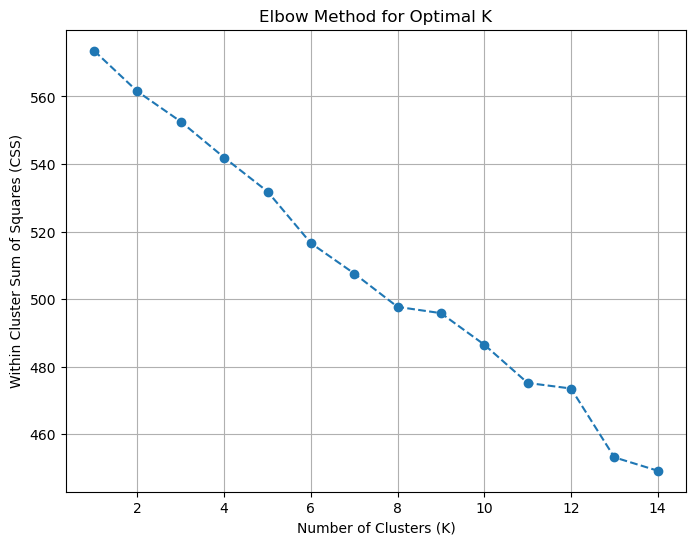

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

csv_file_path = "REFUSAL_ENTRY_2014-November2023.csv"

df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# Prepare the data such that you have three datasets where the REFUSAL_CHARGES, ISO_CNTRY_CODE and CITY_NAME are the columns (features).
# Step 1: Binarize 'ISO_CNTRY_CODE' and 'PROVINCE_STATE'
label_binarizer = LabelBinarizer()
iso_country_encoded = label_binarizer.fit_transform(df['ISO_CNTRY_CODE'].value_counts().where(lambda d: d>10).dropna(axis=0))
label_binarizer2 = LabelBinarizer()
province_state_encoded = label_binarizer2.fit_transform(df['PROVINCE_STATE'].value_counts().where(lambda d: d>25).dropna(axis=0))

# Step 2: Binarize 'REFUSAL_CHARGES'
multi_label_binarizer = MultiLabelBinarizer()
refusal_charges_encoded = multi_label_binarizer.fit_transform(df['REFUSAL_CHARGES'].apply(lambda x: x.split(',')))

# Create DataFrames for the binarized features
iso_country_df = pd.DataFrame(iso_country_encoded, columns=label_binarizer.classes_)
province_state_df = pd.DataFrame(province_state_encoded, columns=label_binarizer2.classes_)
refusal_charges_df = pd.DataFrame(refusal_charges_encoded, columns=multi_label_binarizer.classes_)

# Now you have three separate DataFrames for the binarized features
# iso_country_df, province_state_df, and refusal_charges_df
print("ISO_CNTRY_CODE Dataset", iso_country_df)
print("PROVINCE_STATE Dataset", province_state_df)
print("REFUSAL_CHARGES Dataset", refusal_charges_df)

# Merge the three Dataframes above into one – the final Dataframe should have 435 columns. These represent the features that will allow clustering to occur. This will allow us to see the clusters that emerge along those categories of features in the data. With a bit more information, we might come to the conclusion that some of these features should be removed.
merged_df = pd.concat([iso_country_df, province_state_df, refusal_charges_df], axis=1)
print("Merged DF", merged_df)


# begin the process of clustering
# Perform K-Means clustering
k_values = [5, 10, 12]
for k in k_values:
    # Initialize the K-Means model
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10, random_state=0)
    
    # Fit the model to the dataset
    # I'm Using province_state_df since refusal_charges_df keep on restarting the kernal
    kmeans.fit(province_state_df)
    
    # Get the cluster centroids
    centroids = kmeans.cluster_centers_
    
    # Describe each cluster
    print(f"K={k} Clusters:")
    for i in range(k):
        cluster_data = province_state_df[kmeans.labels_ == i]
        print(f"Cluster {i + 1}:")
        print(f"Number of data points in this cluster: {len(cluster_data)}")
        print(f"Centroid: {centroids[i]}")
        print("\n")


# Perform elbow analysis to find optimal cluster size
max_clusters = 15
# within cluster sum of squares
css = [] 
for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(province_state_df) 
    css.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters), css, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum of Squares (CSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


### (20%) [supervised learning/advances] Listen to this podcast about the future of search and advances in supervised learning. 

We are, as you know, entering an entirely new era of 
human-machine interaction.

LLMs, popularized by ChatGPT, Bard and others, are pushing new
paradigms of interaction with machines, fueling what many are
calling a breakthrough in Artificial Intelligence unlike
any seen in prior advances in the field (AI, has after all, 
been the intense study of computer scientists since the
1950s).

One obvious area where this is going to be immediately obvious 
is in search.  For some time, we have been using search engines
with the "poke and hope" method -- typing in some keywords
and hoping we get what we are looking for.  Have you noticed
that this method doesn't work that well?  Have you also noticed
that sometimes you spend more time trying to find the "right"
keywords instead of getting to what you want with just
the words you have to express what you reall mean?

One reason for this is that our mental models for what 
we are searching for are incomplete -- we often don't 
have enough domain knowledge to phrase the question
in a way that would yield answers even remotely
close to what we would like ...

That is all about to change.

You will listen to this 59 minute podcast interview 
with the CEO of   
Perplexity AI -- a company focused on using AI 
to improve learning.  Search might be the first test
case to demonstrate what is coming in many other areas
of the interesting use cases of AI.

Listen to this podcast:

* Machine Learning Street Talk (MLST): _Perplexity AI_: The Future of Search; May 8, 2023; Interview with Aravind Srinivas, 
  CEO and co founder of [Perplexity AI](https://www.perplexity.ai/).  You will find a variety
  of sources of the interview (pick one):

  * [Apple Podcasts](https://podcasts.apple.com/us/podcast/perplexity-ai-the-future-of-search/id1510472996?i=1000612223005)
  * [Player.fm](https://player.fm/series/machine-learning-street-talk-mlst/perplexity-ai-the-future-of-search)
  * [Spotify](https://podcasters.spotify.com/pod/show/machinelearningstreettalk/episodes/PERPLEXITY-AI%C3%A2%E2%82%AC%E2%80%9DThe-future-of-search-e23i5fq)
  * [Youtube (**no ads**, no tracking, viewed through DDG)](https://duckduckgo.com/?q=machine+learning+street+talk+perplexity&t=vivaldi&iax=videos&ia=videos&iai=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D_vMOWw3uYvk)
  * [Youtube direct (ads, account tracking, etc.)](https://www.youtube.com/watch?v=_vMOWw3uYvk)

Find out what all the hullabuloo is about.

**&#167; Task:**  Summarize the 3-5 main takeaways of the interview?  Be brief. 


**&#167; Task:**  Provide 3-5 sentences expressing your reactions to the interview?  Be direct, succinct and precise. 


**&#167; Task:**  What _one thing_ did you find most interesting or surprising in the interview? 


**&#167; Task:**  Provide _one_ criticism or concern of the work of Perplexity AI, and expand on that criticism with
a few sentences explaining why you feel your criticism/concern is warranted.

# supervised learning/advances
## Summarize the 3-5 main takeaways of the interview? Be brief.
Perplexity AI aims to make the learning process more efficient and enjoyable by providing direct answers to questions.
The company is addressing the challenge of maintaining truthfulness and balancing opinions and facts in a world where algorithmic truth is difficult to achieve.
Education and transparency are crucial to counter potential misuse of AI for political or malicious purposes.

## Provide 3-5 sentences expressing your reactions to the interview? Be direct, succinct and precise.
The interview provides a compelling glimpse into the future of AI in search and learning. The idea of making advertising more relevant and less intrusive using large language models is particularly interesting. It’s encouraging to see how AI can be used to improve not just the efficiency, but also the quality of our digital experiences.

## What one thing did you find most interesting or surprising in the interview?
The ability for users to update data in AI models can be an interesting and valuable feature. It allows for the incorporation of the latest information, which is crucial for the accuracy and relevance of the model's output. This feature can be particularly beneficial in fields where data is constantly evolving, such as healthcare, finance, and technology. By enabling users to update data, AI models can adapt to new trends, insights, and changes in the environment, leading to more informed and up-to-date decision-making.

## Provide one criticism or concern of the work of Perplexity AI, and expand on that criticism with a few sentences explaining why you feel your criticism/concern is warranted.
Data Privacy: As with any AI system, data privacy is a crucial concern. Users might be wary about how their data is being used and whether it’s being stored or shared. While Perplexity AI might have measures in place to protect user data, it’s essential for users to be aware of these measures and understand how their data is being handled.